# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Vieving the Dataset

In [2]:
df_male = pd.read_csv(r"C:\Users\EmincanY\Desktop\Soldier Capstone\ANSUR II MALE Public.csv",encoding='latin-1') 

df_female = pd.read_csv(r"C:\Users\EmincanY\Desktop\Soldier Capstone\ANSUR II FEMALE Public.csv",encoding='latin-1')

df = pd.concat([df_male, df_female])

In [3]:
df.reset_index(drop=True, inplace=True)

In [4]:
dropped = ['subjectid', 
           'SubjectNumericRace', 
           'Ethnicity', 'Heightin', 
           'Weightlbs', 'Date', 
           'Installation', 'Component', 
           'Branch', 'PrimaryMOS', 
           'SubjectId']

In [5]:
df.drop(dropped , axis = 1 ,inplace = True)

In [6]:
df.shape

(6068, 98)

## Dedecting Missing Values

In [7]:
df.isna().sum().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.0,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.0,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.0,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.0,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.0,1302.0,1349.00,1553.0
...,...,...,...,...,...,...,...,...
weightkg,6068.0,797.093935,156.528164,358.0,682.0,785.0,896.00,1442.0
wristcircumference,6068.0,169.002966,13.124513,124.0,159.0,170.0,179.00,216.0
wristheight,6068.0,830.059987,47.650519,672.0,797.0,830.0,863.00,1009.0
DODRace,6068.0,1.615030,0.979156,1.0,1.0,1.0,2.00,8.0


## Outlier Dedection

In [9]:
df.shape

(6068, 98)

In [10]:
def outlier_deleter(df,target_col , whisker):
  for col in df.drop(target_col , axis = 1).columns : 
    if df[col].dtype != 'object':
      q3 =  np.percentile(df[col] , 75)
      q1 =  np.percentile(df[col] , 25)

      iqr = q3 - q1
      low_lim = q1 - (whisker*iqr)
      high_lim = q3 + (whisker*iqr)

      outlier_indexes = df[ (df[col] > high_lim) | (df[col] < low_lim) ].index
      df.drop(outlier_indexes , axis = 0 , inplace = True)
      print(f'Total outlier {len(outlier_indexes)} in {col} column and dropped.')

In [11]:
outlier_deleter(df,'DODRace',1.5)

Total outlier 46 in abdominalextensiondepthsitting column and dropped.
Total outlier 15 in acromialheight column and dropped.
Total outlier 31 in acromionradialelength column and dropped.
Total outlier 70 in anklecircumference column and dropped.
Total outlier 10 in axillaheight column and dropped.
Total outlier 6 in balloffootcircumference column and dropped.
Total outlier 6 in balloffootlength column and dropped.
Total outlier 0 in biacromialbreadth column and dropped.
Total outlier 14 in bicepscircumferenceflexed column and dropped.
Total outlier 58 in bicristalbreadth column and dropped.
Total outlier 5 in bideltoidbreadth column and dropped.
Total outlier 1 in bimalleolarbreadth column and dropped.
Total outlier 39 in bitragionchinarc column and dropped.
Total outlier 7 in bitragionsubmandibulararc column and dropped.
Total outlier 13 in bizygomaticbreadth column and dropped.
Total outlier 34 in buttockcircumference column and dropped.
Total outlier 9 in buttockdepth column and dr

In [12]:
df.shape

(4671, 98)

In [13]:
df.reset_index(drop=True, inplace=True)

## Looking the Target Variable

In [14]:
df['DODRace'].value_counts()

1    3026
2     875
3     556
4     135
6      40
5      36
8       3
Name: DODRace, dtype: int64

In [15]:
df.drop(df[df['DODRace'] > 3].index, axis = 0, inplace=True) # We should drop some classes because there is less than 500 data. Model could'nt predict well them.

In [16]:
df.reset_index(inplace=True, drop=True)

In [17]:
df.corr()['DODRace'].drop('DODRace').sort_values()

sittingheight           -0.335682
eyeheightsitting        -0.329963
wristheight             -0.293509
stature                 -0.264516
acromialheight          -0.249822
                           ...   
bizygomaticbreadth       0.043524
thighcircumference       0.044081
bitragionchinarc         0.096268
heelbreadth              0.177851
interpupillarybreadth    0.188455
Name: DODRace, Length: 94, dtype: float64

In [18]:
abs(df.corr()['DODRace'].drop('DODRace')).sort_values(ascending=False).head(10)

sittingheight             0.335682
eyeheightsitting          0.329963
wristheight               0.293509
stature                   0.264516
acromialheight            0.249822
cervicaleheight           0.246343
axillaheight              0.238382
suprasternaleheight       0.235927
chestheight               0.221413
lateralmalleolusheight    0.219253
Name: DODRace, dtype: float64

In [19]:
# df.drop(abs(df.corr()['DODRace'].drop('DODRace')).sort_values(ascending=False).head(10).index , axis = 1 , inplace = True)

In [20]:
df.shape

(4457, 98)

In [21]:
df['DODRace'].value_counts()

1    3026
2     875
3     556
Name: DODRace, dtype: int64

## Creating X and y features

In [22]:
X = df.drop('DODRace',axis=1)
# X_ohe = pd.get_dummies(df.drop('DODRace',axis=1),drop_first=True) # This might be better.
y = df['DODRace']

## Handling Imbalanced Data

In [25]:
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE

enc = OrdinalEncoder()

cat = X.select_dtypes('object').columns

X[cat] = enc.fit_transform(X[cat])




oversample = SMOTE()

X, y_smote = oversample.fit_resample(X,y) 

# This is for tree base models.

In [ ]:
# from imblearn.over_sampling import SMOTE

# oversample = SMOTE()
# X, y_smote = oversample.fit_resample(X, y)

# # This is doing oversampling.

In [ ]:
# from imblearn.combine import SMOTETomek

# smt = SMOTETomek(random_state=42)
# X_ohe, y = smt.fit_resample(X_ohe, y)

# It does both increment and decrement

In [ ]:
# from imblearn.combine import SMOTEENN

# smt = SMOTEENN(random_state=42)
# X_ohe, y = smt.fit_resample(X_ohe, y)

# LogisticRegression

## Train | Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_smote, test_size=0.2, random_state=53)

## Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
# scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## GridSearch For Best Model

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
# svc_vanilla = SVC(class_weight = 'balanced' , random_state = 53)

# param_grid = {'C' : [100,300,500,800,1000,1250,1500],
#               'gamma' : ['auto','scale'],
#               'decision_function_shape' : ['ovo', 'ovr']}

# svc_grid_model = GridSearchCV(svc_vanilla,
#                               param_grid=param_grid,
#                               cv=5,
#                               scoring='accuracy',
#                               verbose=2,
#                               n_jobs=-1)

# svc_grid_model.fit(X_train_scaled, y_train)

In [ ]:
# svc_grid_model.best_score_

In [ ]:
# svc_grid_model.best_params_                 # C = 800 or 1000 , decision_function_shape = 'ovo' , gamma = 'scale'

In [ ]:
# svc_grid_model = SVC(C = svc_grid_model.best_params_['C'] , max_iter=10000, class_weight = 'balanced' , gamma = svc_grid_model.best_params_['gamma'] , 
#                      decision_function_shape = svc_grid_model.best_params_['decision_function_shape'],
#                      random_state = 53).fit(X_train_scaled , y_train)

In [29]:
svc_grid_model = SVC(C = 800 , decision_function_shape = 'ovo' , gamma = 'scale' , class_weight = 'balanced' , random_state = 53).fit(X_train_scaled,y_train)

## Model Evaluation

In [30]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [31]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    plot_confusion_matrix(model, X_test, y_test)
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test Set")
    print(classification_report(y_test, y_pred), end='\n')
    print("Train Set")
    print(classification_report(y_train, y_train_pred))

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Test Set
              precision    recall  f1-score   support

           1       0.98      0.92      0.95       627
           2       0.98      0.99      0.99       610
           3       0.93      0.98      0.95       579

    accuracy                           0.96      1816
   macro avg       0.96      0.96      0.96      1816
weighted avg       0.96      0.96      0.96      1816

Train Set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2399
           2       1.00      1.00      1.00      2416
           3       1.00      1.00      1.00      2447

    accuracy                           1.00      7262
   macro avg       1.00      1.00      1.00      7262
weighted avg       1.00      1.00      1.00      7262



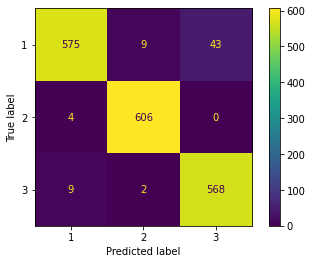

In [32]:
eval_metric(svc_grid_model , X_train_scaled , y_train , X_test_scaled , y_test)

In [34]:
from sklearn.model_selection import cross_validate

svc_grid_model = SVC(C = 800 , decision_function_shape = 'ovo' , gamma = 'scale' , class_weight = 'balanced' , random_state = 53)

cross_validate(svc_grid_model , X_train_scaled , y_train , cv = 5 , scoring = 'accuracy')['test_score'].mean()

0.9577247795479668

## Visulization Multiclass Roc

In [48]:
# from sklearn.metrics import roc_curve, auc, plot_precision_recall_curve

In [47]:
# def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
#     y_score = clf.decision_function(X_test)

#     # structures
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()

#     # calculate dummies once
#     y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
#     for i in range(n_classes):
#         fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     # roc for each class
#     fig, ax = plt.subplots(figsize=figsize)
#     ax.plot([0, 1], [0, 1], 'k--')
#     ax.set_xlim([0.0, 1.0])
#     ax.set_ylim([0.0, 1.05])
#     ax.set_xlabel('False Positive Rate')
#     ax.set_ylabel('True Positive Rate')
#     ax.set_title('Receiver operating characteristic example')
#     for i in range(n_classes):
#         ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
#     ax.legend(loc="best")
#     ax.grid(alpha=.4)
#     sns.despine()
#     plt.show()

In [46]:
# plot_multiclass_roc(svc_grid_model, X_train_scaled, y_train, n_classes=3, figsize=(16, 10))

In [45]:
# plot_multiclass_roc(svc_grid_model, X_test_scaled, y_test, n_classes=3, figsize=(16, 10))

In [ ]:
# Done